In [1]:
import numpy as np
import kpm
import wget
import os
import pickle
from matplotlib import pyplot as plt
from astropy.io import fits

In [2]:
url = 'https://www.emilyjgriffith.com/s/'
#if(os.path.isfile('lnqs.npy')==False): wget.download(url+'lnqs.npy') # W22 q vectors
#if(os.path.isfile('lnAs.npy')==False): wget.download(url+'lnAs.npy') # W22 A vectors
#if(os.path.isfile('alldata_train.npy')==False): wget.download(url+'alldata_train.npy') # APOGEE stellar abundances
#if(os.path.isfile('allivars_train.npy')==False): wget.download(url+'allivars_train.npy') # APOGEE stellar abundance inverse variance

In [3]:
elements  = np.array(['Mg','O','Si','S','Ca','CN','Na','Al','K','Cr','Fe','Ni','Mn','Co','Ce'])
alldata = np.load('alldata_train.npy')
allivars = np.load('allivars_train.npy')

data = kpm.abund_data(elements, alldata, allivars)

In [4]:
data

kpm.abund_data{
    Elements ------------ > ['Mg' 'O' 'Si' 'S' 'Ca' 'CN' 'Na' 'Al' 'K' 'Cr' 'Fe' 'Ni' 'Mn' 'Co' 'Ce']
    Number of elements -- > 15
    Number of stars ----- > 48659
}

In [5]:
fixed = kpm.fixed_params(data, K=2, J=9)

In [6]:
fixed

kpm.fixed_params{
    K ------------------- > 2
    Processes ----------- > ['CC' 'Ia']
    CC element ---------- > Mg
    Ia element ---------- > Fe
    q_CC_Fe ------------- > 0.4
    J ------------------- > 9
    Lambda a ------------ > 1000000.0
    Lambda c ------------ > 1000.0
    Lambda_d ------------ > 1000.0
    xlim ---------------- > [-0.5818765   0.36397953]
}

In [9]:
#data, fit = kpm.initialize_2(data, fixed)
# dont need this, initialization done in run_kpm

In [10]:
# Fix this filename
file = '/Users/emilygriffith/KProcessModel/API/test_fits'
data, fixed, fit = kpm.run_kpm(data, fixed, file, 'MW_disk', N_itters=16, overwrite=True)

(2, 9, 15)
A-step(): fixing small elements: 19 -613.2041
initialize_2(): [-0.40269452]
q-step(): fixing small elements: 1 -16.118095
A-step(): fixing large elements: 8 5626.391
A-step(): fixing small elements: 213 -2842464800.0
initialize_2(): [-0.4033811]
File /Users/emilygriffith/KProcessModel/API/test_fits/MW_disk_K2_qccFe0.4_0.out exists, but overwriting
A-step(): fixing bad elements: 2
A-step(): fixing large elements: 3 9318.382
A-step(): fixing small elements: 73 -206176910.0
Aq-step(): A-step WARNING: objective function got worse: 1949155.8 2030330.9
1871386.0 2074682.0 1949155.8 1949155.8 1949155.8
Aq-step(): we didn't take a step :( -4.0 1871386.0 -77769.75
A-step(): fixing large elements: 1 1011.49414
A-step(): fixing small elements: 74 -1474816300.0
1871386.0 2075747.9 1950233.9 1950234.0 1884459.0
Aq-step(): we didn't take a step :( -4.0 1871386.0 -13073.0
A-step(): fixing large elements: 1 109.240105
A-step(): fixing small elements: 73 -66615750.0
1871386.0 2077630.0 19507

A-step(): fixing small elements: 31 -722634.4
1590061.5 1786494.2 1738404.8 1738404.8 1644355.2
Aq-step(): we didn't take a step :( -4.0 1590061.5 -54293.75
A-step(): fixing small elements: 31 -22663980.0
1590061.5 1786738.8 1738709.0 1738709.0 1644328.4
Aq-step(): we didn't take a step :( -4.0 1590061.5 -54266.875
A-step(): fixing small elements: 30 -383212580.0
1590061.5 1787892.4 1739737.8 1739737.6 1644560.6
Aq-step(): we didn't take a step :( -4.0 1590061.5 -54499.125


In [18]:
hdu1 = fits.open('/Users/emilygriffith/Desktop/Tables/KPM_qcc_K2.fits')
hdu2 = fits.open('/Users/emilygriffith/Desktop/Tables/KPM_qIa_K2.fits')

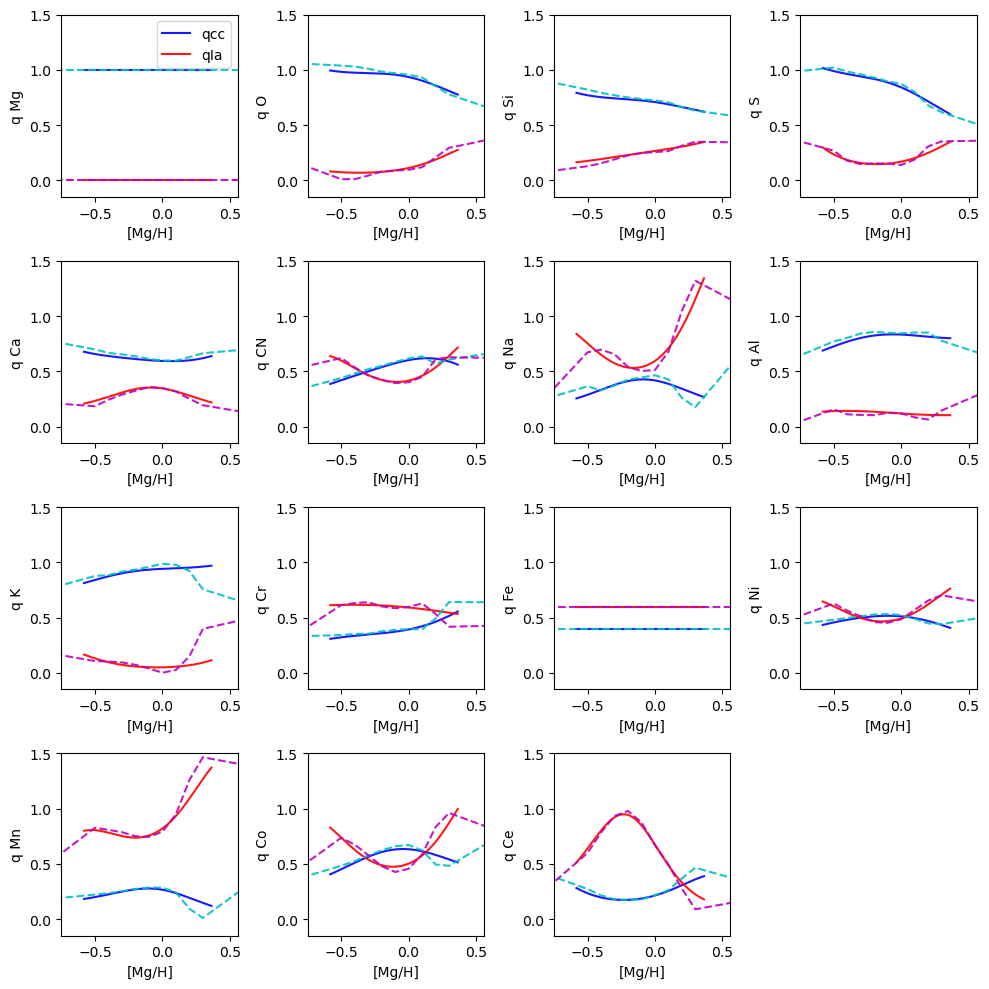

In [19]:
kpm.plot_qs(data, fixed, fit)

for i in range(data.M):
    plt.subplot(4,4,i+1)
    MgH = hdu1[1].data.Mg_H
    qcc = hdu1[1].data['qcc_'+data.elements[i]]
    qIa = hdu2[1].data['qIa_'+data.elements[i]]

    plt.plot(MgH, qcc, 'c--', alpha=0.9, label='qcc_old')
    plt.plot(MgH, qIa, 'm--', alpha=0.9, label='qIa_old')

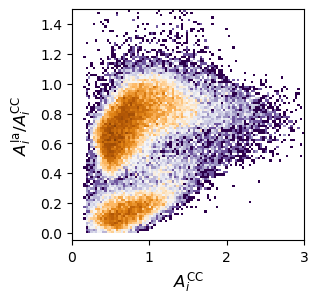

In [20]:
kpm.plot_As(fit)

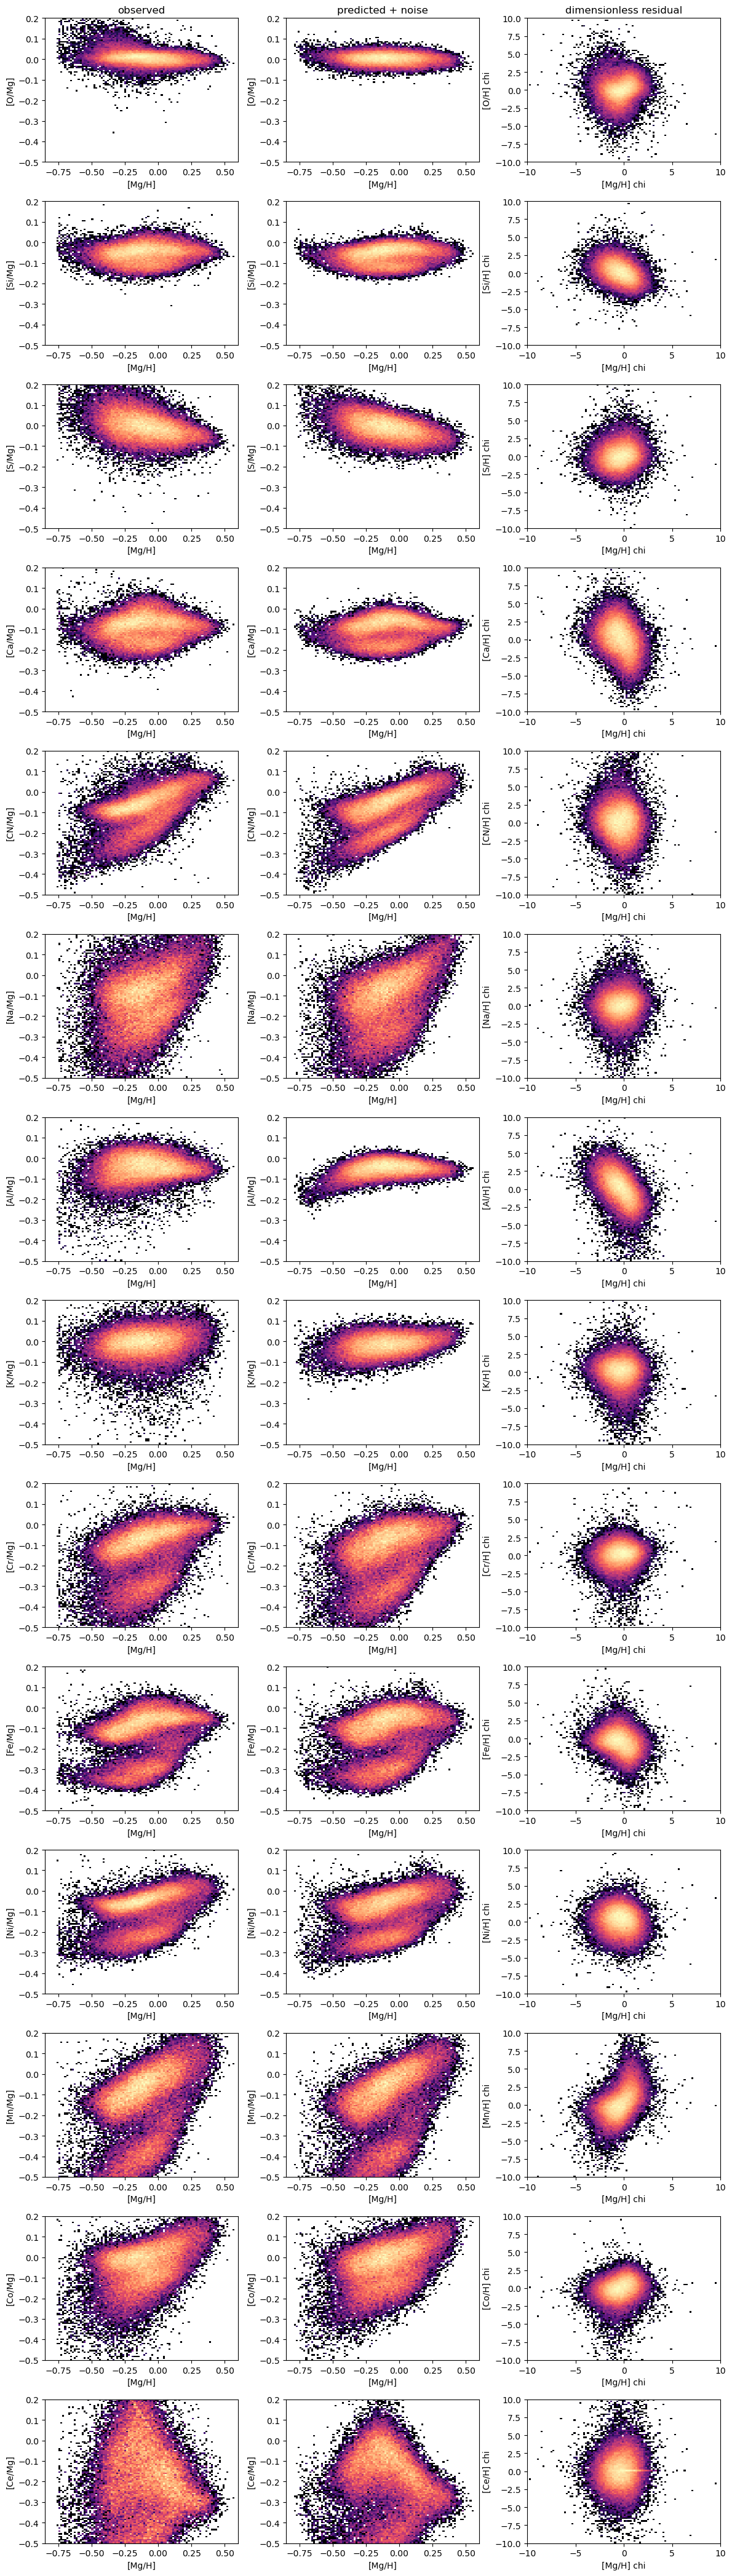

In [21]:
kpm.plot_model_abundances(data, fixed, fit, noise=True)